In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


In [64]:
def to_chromatic_coordinates(img):
    '''
    Asume imagen color en RGB uint8 y pasa a coordenadas cromaticas.
    '''
    #sum_of_channels = img[:,:,0] + img[:,:,1] + img[:,:,2]
    sum_of_channels = cv.add(img[:,:,0],cv.add(img[:,:,1],img[:,:,2]))
    adjusted_red = img[:,:,0] / (sum_of_channels+0.000001)
    adjusted_green = img[:,:,1] / (sum_of_channels+0.000001)
    adjusted_blue = img[:,:,2] / (sum_of_channels+0.000001)
    adjusted_img = np.stack([adjusted_red,adjusted_green,adjusted_blue],axis=2)
    return adjusted_img

In [55]:
def white_patch(img):
    '''
    Implementacion del White Patch algorithm.
    <INPUT> np.array - Imagen de MxNx3, asume RGB
    <OUTPUT> np.array [MxNx3] - Imagen ajustada con el white patch algorithm
    
    '''
    # Toma maximos por canales
    Rmax = np.max(img[:,:,0])
    Gmax = np.max(img[:,:,1])
    Bmax = np.max(img[:,:,2])
    
    new_red = 255/Rmax * img[:,:,0]
    new_green= 255/Gmax * img[:,:,1]
    new_blue= 255/Bmax * img[:,:,2]
      
    adjusted_img = np.round(np.stack([new_red,new_green,new_blue],axis=2)).astype(np.uint8)
    return adjusted_img
    

# Pruebas de contraste - Coordenadas cromaticas

In [59]:
claro = cv.imread('CoordCrom_1.png')
claro = cv.cvtColor(img, cv.COLOR_BGR2RGB)

medio = cv.imread('CoordCrom_2.png')
medio = cv.cvtColor(medio, cv.COLOR_BGR2RGB)

oscuro = cv.imread('CoordCrom_3.png')
oscuro = cv.cvtColor(oscuro, cv.COLOR_BGR2RGB)


In [78]:
adjusted_claro = to_chromatic_coordinates(claro)
adjusted_medio = to_chromatic_coordinates(medio)
adjusted_oscuro = to_chromatic_coordinates(oscuro)

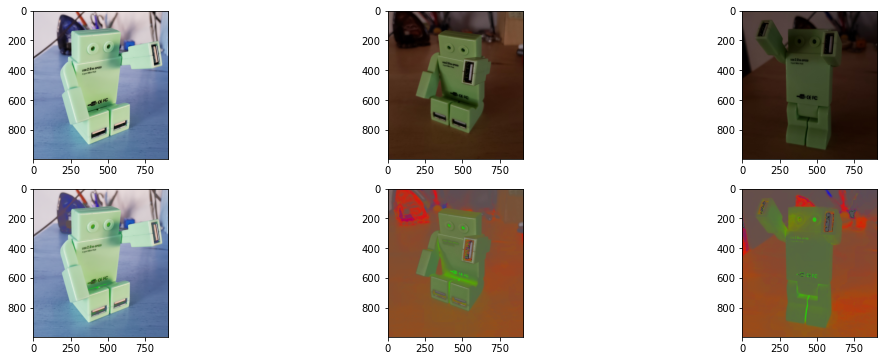

In [87]:
f, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,6))

ax[0][0].imshow(claro)
ax[1][0].imshow(adjusted_claro)

ax[0][1].imshow(medio)
ax[1][1].imshow(adjusted_medio)

ax[0][2].imshow(oscuro)
ax[1][2].imshow(adjusted_oscuro)

plt.show()

# White patch algorithm - Luchando contra la iluminación de colores

In [34]:
#Cargamos imagenes y ponemos en RGB
r_tito = cv.imread('WP_R.png')
r_tito = cv.cvtColor(r_tito,cv.COLOR_BGR2RGB)

b_tito = cv.imread('WP_B.png')
b_tito = cv.cvtColor(b_tito,cv.COLOR_BGR2RGB)

o_tito = cv.imread('WP_O.png')
o_tito = cv.cvtColor(o_tito,cv.COLOR_BGR2RGB)


In [56]:
adjusted_r_tito = white_patch(r_tito)

adjusted_o_tito = white_patch(o_tito)

adjusted_b_tito = white_patch(b_tito)

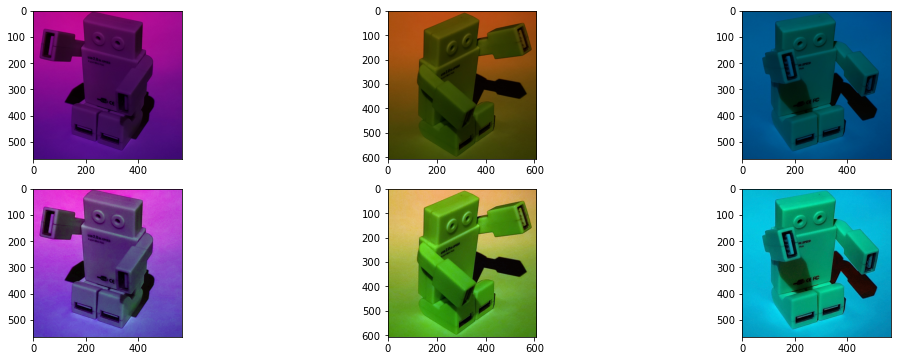

In [57]:
f, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,6))

ax[0][0].imshow(r_tito)
ax[1][0].imshow(adjusted_r_tito)

ax[0][1].imshow(o_tito)
ax[1][1].imshow(adjusted_o_tito)

ax[0][2].imshow(b_tito)
ax[1][2].imshow(adjusted_b_tito)

plt.show()